#### Подключение библиотек и скриптов

In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

#### Загрузка данных

In [349]:
df = pd.read_csv('train.csv', index_col=0)

### Обзор обучающего датасета (train dataset overview)

In [350]:
# проверка, что данные загрузились верно (кодировка, структура и т.д.)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


#### Обзор столбцов и оценка типа данных

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(8), object(3)
memory usage: 1.5+ MB


#### Оценка объемов данных

In [352]:
# оценка объемов данных
df.shape

(10000, 19)

#### Обзор количественных переменных

In [273]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### Обзор номинативных переменных

In [274]:
df.select_dtypes(include='object').head()

,Ecology_2,Ecology_3,Shops_2
Id,,,
14038,B,B,B
15053,B,B,B
4765,B,B,B
5809,B,B,B
10783,B,B,B


In [353]:
df['DistrictId'].value_counts().head(10)

27    851
1     652
23    565
6     511
9     294
62    247
30    228
58    179
53    174
21    165
Name: DistrictId, dtype: int64

In [354]:
df['Ecology_2'].value_counts(normalize = True)

B    0.9903
A    0.0097
Name: Ecology_2, dtype: float64

In [355]:
df['Ecology_3'].value_counts(normalize = True)

B    0.9725
A    0.0275
Name: Ecology_3, dtype: float64

In [356]:
df['Shops_2'].value_counts(normalize = True)

B    0.9175
A    0.0825
Name: Shops_2, dtype: float64

### Предобработка (data prepararion)

#### Обработка пропусков

In [357]:
# ищем пропуски, видим что нужно поработать с пропусками в LifeSquare и Healthcare_1
df.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

#### LifeSquare

In [358]:
# заменим пропуски в LifeSquare медианами подвыборки по количеству комнат.
df_median_1room = df.loc[df['Rooms'] == 1]['LifeSquare'].median()
df_median_2room = df.loc[df['Rooms'] == 2]['LifeSquare'].median()
df_median_3room = df.loc[df['Rooms'] == 3]['LifeSquare'].median()
df_median_4room = df.loc[df['Rooms'] == 4]['LifeSquare'].median()
df_median_5room = df.loc[df['Rooms'] == 5]['LifeSquare'].median()
df_median = df['LifeSquare'].median()

In [359]:
print(df_median_1room, df_median_2room, df_median_3room, df_median_4room, df_median_5room, df_median)

21.66392883217304 32.5521342349919 46.96048008775955 64.94654758809416 80.45891031600135 32.781260192155735


In [360]:
# напишем функцию, которая будет в зависимости от количества комнат заполнять пропуски той или иной медианой
def fill_LifeSquare(row):
    if pd.isnull(row['LifeSquare']):
        if row['Rooms'] == 1:
            return df_median_1room
        if row['Rooms'] == 2:
            return df_median_2room 
        if row['Rooms'] == 3:
            return df_median_3room
        if row['Rooms'] == 4:
            return df_median_4room
        if row['Rooms'] == 5:
            return df_median_5room
        else:
            return df_median
    return row['LifeSquare']

In [361]:
# заполняем пропуски
df['LifeSquare'] = df.apply(fill_LifeSquare, axis = 1)

In [362]:
# видно, что теперь нет пропусков по LifeSquare
df.loc[pd.isnull(df['LifeSquare'])]['LifeSquare'].sum()

0.0

#### Healthcare_1

In [363]:
# пропущенные значения Healthcare_1 заменим медианой
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()

In [364]:
# видно, что теперь нет пропусков по Healthcare_1
df.loc[pd.isnull(df['Healthcare_1'])]['Healthcare_1'].sum()

0.0

#### Обработка выбросов

In [365]:
# определяю наиболее важные переменные, которые взаимодействуют с целевой
# вижу, что это Rooms и Square, поэтому сделаем обработку выбросов именно по этим переменным.
df.corr()['Price'][:10]

DistrictId       0.265100
Rooms            0.550291
Square           0.520075
LifeSquare       0.092381
KitchenSquare    0.028864
Floor            0.128715
HouseFloor       0.088280
HouseYear        0.004305
Ecology_1       -0.058381
Social_1         0.263286
Name: Price, dtype: float64

#### Square

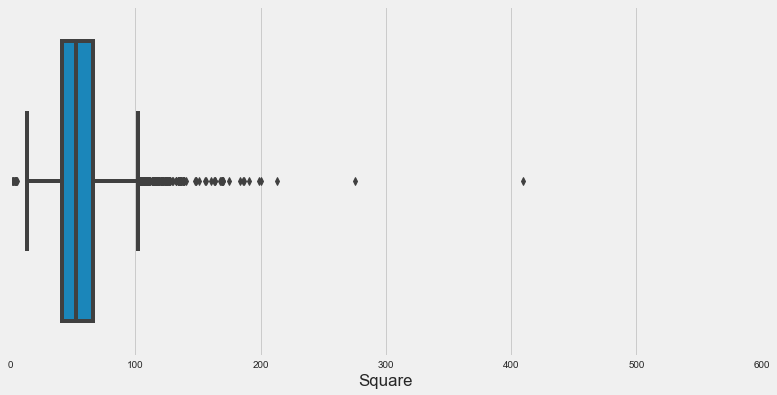

In [369]:
# построим график boxplot
# видим, что есть выбросы по правую сторону
plt.figure(figsize=(12, 6))
plt.axis([0, 600, 0, 1])
sns.boxplot(df['Square']);

In [370]:
# определим, что выбросы - это все те наблюдения, которые находятся за границу межквартильного размаха*1.5
df['Square'].quantile([0.25,0.5,0.75])

0.25    41.774881
0.50    52.513310
0.75    65.900625
Name: Square, dtype: float64

In [371]:
# определение межквартильного размаха
IQR = np.percentile(df['Square'], 75, interpolation = 'midpoint') - np.percentile(df['Square'], 25, interpolation = 'midpoint')
IQR

24.127510243838984

In [372]:
# определение границ
upper_outlines = IQR * 1.5 + np.percentile(df['Square'], 75, interpolation = 'midpoint') 
lower_outlines = np.percentile(df['Square'], 25, interpolation = 'midpoint') - IQR * 1.5
print(upper_outlines, lower_outlines)

102.09308801533868 5.583047039982752


In [373]:
# замена выбросов медиаными значениями
df.loc[(df['Square'] > upper_outlines) | (df['Square'] < lower_outlines), 'Square'] = df['Square'].median()

In [374]:
# видим, что после того, как выбросы заменили медеиаными значениями коэффициент корреляции Square подрос на ~ 0.02
df.corr()['Price'][:2]

DistrictId    0.265100
Rooms         0.550291
Name: Price, dtype: float64

In [375]:
# определяем количество некорректных значений Square, в которых значение меньше, чем сумма LifeSquare и KitchenSquare
# таких занчений чуть меньше 10% от общего числа выборки
df.loc[df['Square'] < df['LifeSquare'] + df['KitchenSquare'], 'Square'].count()

973

In [59]:
# возможно, что эти 973 смогут оказать значимое влияние на наш прогноз, поэтому нужно данные значения заменить.
# поэтому в наш датасет заведем еще одну переменную AddSquare, которая будет расчитываться Square-LifeSquare+KitchenSquare

In [376]:
# вычисляю новую переменную, меняю местами столбцы для удобства восприятия.
df['AddSquare'] = np.abs(df['Square'] - (df['LifeSquare']+ df['KitchenSquare']))
cols = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'AddSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price']
df = df[cols]

##### AddSquare

In [377]:
df['AddSquare'].describe()

count    10000.000000
mean        17.639204
std         80.321338
min          0.006128
25%          9.003386
50%         13.191054
75%         20.722890
max       7399.897712
Name: AddSquare, dtype: float64

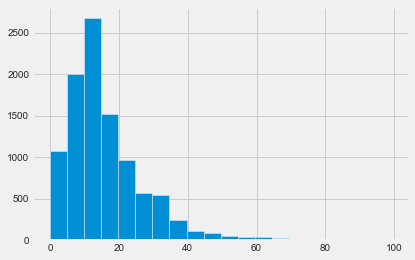

In [378]:
# график без учета выбросов
df.loc[df['AddSquare']<100]['AddSquare'].hist(bins = 20);

In [379]:
# вычисляю медиану AddSquare
df_median_AddSquare = df['AddSquare'].median()
df_median_AddSquare

13.191053660253985

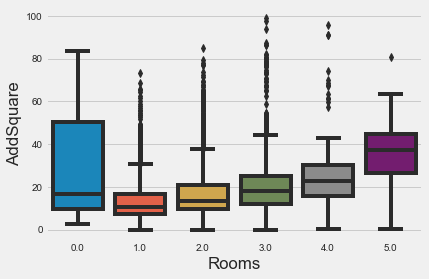

In [380]:
# визуализируем распределение df_median_AddSquare по количеству комнат
# видно, что медианы 1,2 комнат отличаются от медианы комнат 5, возможно стоит взять две медианы для комнат от 1 до 2 и медианы
# для всех остальных.
sns.boxplot(df.loc[df['Rooms'] < 6 , 'Rooms'], df.loc[df['AddSquare'] < 100, 'AddSquare'], data = df);

In [381]:
# видно, что df_median_AddSquare_room_3_4_5 практически равна df_median_AddSquare
df_median_AddSquare_room_1_2 = df.loc[(df['Rooms'] == 1) | (df['Rooms'] == 2), 'AddSquare'].median()
df_median_AddSquare_room_3_4_5 = df.loc[(df['Rooms'] != 1) | (df['Rooms'] != 2), 'AddSquare'].median()
print(df_median_AddSquare_room_1_2, df_median_AddSquare_room_3_4_5)

12.129412558800052 13.191053660253985


In [382]:
# посчитав границы выбросов по AddSquare понял, что нижняя граница уходи в минус,соответственно границе по нижней отсечке 
# брать не стоит, но и оставлять значения, которые около нуля тоже не стоит, если так подумать, то разумно взять нижнюю
# отсечку примерно в районе 4
IQR_AddSquare = np.percentile(df['AddSquare'], 75, interpolation = 'midpoint') - np.percentile(df['AddSquare'], 25, interpolation = 'midpoint')
upper_outlines_AddSquare = IQR_AddSquare  * 1.5 + np.percentile(df['AddSquare'], 75, interpolation = 'midpoint') 
lower_outlines_AddSquare = np.percentile(df['AddSquare'], 25, interpolation = 'midpoint') - IQR_AddSquare  * 1.5
print(upper_outlines_AddSquare, lower_outlines_AddSquare)

38.31487399390276 -8.583751262796493


In [383]:
#заменяем выбросы AddSquare, которые меньше 4 медианым значением
df.loc[df['AddSquare'] < 4, 'AddSquare'] = df['AddSquare'].median()

In [384]:
#заменяем выбросы AddSquare медианым значением
df.loc[(df['AddSquare'] > 39) & ((df['Rooms'] == 1) |(df['Rooms'] == 2)), 'AddSquare'] = df_median_AddSquare_room_1_2

In [385]:
df.loc[(df['AddSquare'] > 39) & ((df['Rooms'] != 1) |(df['Rooms'] != 2)), 'AddSquare'] = df['AddSquare'].median()

##### KitchenSquare

In [386]:
df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

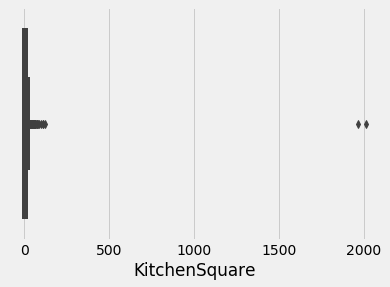

In [71]:
# построим boxplot
# видны два выброса в районе 2000, будем делать замену на медиану
sns.boxplot(df['KitchenSquare']);

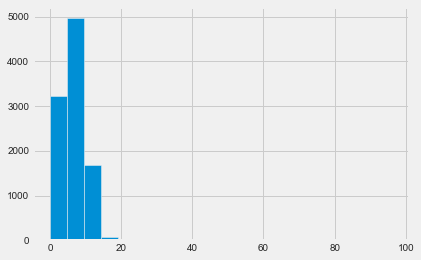

In [387]:
# гистограмма без выбросов
df.loc[df['KitchenSquare']<100]['KitchenSquare'].hist(bins = 20);

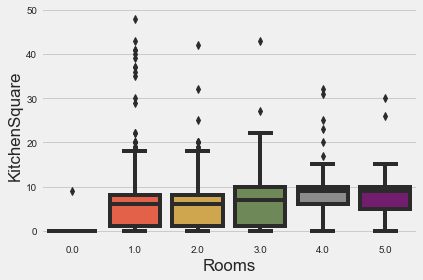

In [388]:
# оценить стоит ли делить при замене выбросов несколькр медиан или можно обойтись одной
sns.boxplot(df.loc[df['Rooms'] < 6 , 'Rooms'], df.loc[df['KitchenSquare'] < 50, 'KitchenSquare'], data = df);

In [389]:
# графики показывают, что есть выбросы в обе стороны распределения. 
# будем заменять их на медиану
df_median_KitchenSquare = df['KitchenSquare'].median()
df_median_KitchenSquare

6.0

In [390]:
IQR_KitchenSquare = np.percentile(df['KitchenSquare'], 75, interpolation = 'midpoint') - np.percentile(df['KitchenSquare'], 25, interpolation = 'midpoint')
upper_outlines_KitchenSquare = IQR_KitchenSquare  * 1.5 + np.percentile(df['KitchenSquare'], 75, interpolation = 'midpoint') 
lower_outlines_KitchenSquare = np.percentile(df['KitchenSquare'], 25, interpolation = 'midpoint') - IQR_KitchenSquare  * 1.5
print(upper_outlines_KitchenSquare, lower_outlines_KitchenSquare)

21.0 -11.0


In [391]:
# беру 5 так как логика здарвого смысла подсказывает, что кухни меньше, чем 5 маловероятны. 
df.loc[df['KitchenSquare'] < 5, 'KitchenSquare'] = df_median_KitchenSquare
df.loc[df['KitchenSquare'] > upper_outlines_KitchenSquare, 'KitchenSquare'] =  df_median_KitchenSquare

In [392]:
df['KitchenSquare'].describe()

count    10000.000000
mean         7.341400
std          2.153859
min          5.000000
25%          6.000000
50%          6.000000
75%          9.000000
max         21.000000
Name: KitchenSquare, dtype: float64

##### LifeSquare

In [393]:
df['LifeSquare'].describe()

count    10000.000000
mean        35.866694
std         76.758441
min          0.370619
25%         21.906744
50%         32.552134
75%         44.407075
max       7480.592129
Name: LifeSquare, dtype: float64

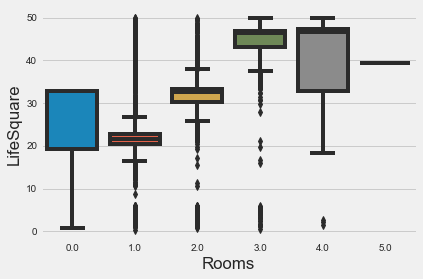

In [394]:
# есть смысл разделить медиану для 1 комнаты и для всех остальных. 
sns.boxplot(df.loc[df['Rooms'] < 6 , 'Rooms'], df.loc[df['LifeSquare'] < 50, 'LifeSquare'], data = df);

In [395]:
df_median_LifeSquare = df['LifeSquare'].median()
df_median_LifeSquare_room1 = df.loc[df['Rooms'] == 1, 'LifeSquare'].median() #медиана для 1 комнаты
print(df_median_LifeSquare, df_median_LifeSquare_room1)

32.5521342349919 21.66392883217304


In [396]:
IQR_LifeSquare = np.percentile(df['LifeSquare'], 75, interpolation = 'midpoint') - np.percentile(df['LifeSquare'], 25, interpolation = 'midpoint')
upper_outlines_LifeSquare = IQR_LifeSquare  * 1.5 + np.percentile(df['LifeSquare'], 75, interpolation = 'midpoint') 
lower_outlines_LifeSquare = np.percentile(df['LifeSquare'], 25, interpolation = 'midpoint') - IQR_LifeSquare  * 1.5
print(upper_outlines_LifeSquare, lower_outlines_LifeSquare)

78.16024445972798 -11.845772585079992


In [397]:
# беру 9.5 так как логика здарвого смысла подсказывает, что комнаты меньше, чем 9.5 маловероятны. 
df.loc[(df['LifeSquare'] < 9.5) & (df['Rooms'] == 1), 'LifeSquare'] =  df_median_LifeSquare_room1
df.loc[df['LifeSquare'] < 9.5, 'LifeSquare'] = df_median_LifeSquare
df.loc[df['LifeSquare'] > upper_outlines_LifeSquare, 'LifeSquare'] =  df_median_LifeSquare

In [398]:
# заключительный этап обработки выбросов Square, там где Square меньше суммы остальных площадей, заменяем суммой
df.loc[df['Square']<(df['LifeSquare']),'Square'] = df['LifeSquare']+df['KitchenSquare']+df['AddSquare']

In [399]:
# обработка Square дала нам в общем итоге прибавку ~ 0.03 немного, но возможно в дальнейшем при построении модели эти
# манипуляции себя обравдают. Пока что можно говорить о том, что простая замена выбросов Square приоритетней, чем подсчет общей
# площади с последующей заменой. 
df.corr()['Price'][:3]

DistrictId    0.265100
Rooms         0.550291
Square        0.549459
Name: Price, dtype: float64

### Rooms

In [400]:
# видно, что у Rooms есть выбросы в виде нулевых значений
df['Rooms'].value_counts(normalize = True)

2.0     0.3880
1.0     0.3705
3.0     0.2235
4.0     0.0150
5.0     0.0018
0.0     0.0008
10.0    0.0002
19.0    0.0001
6.0     0.0001
Name: Rooms, dtype: float64

In [401]:
# заменим нули на количество комнат исходя из показателей LifeSquare
def fill_rooms(row):
    if row['Rooms'] == 0:
        if row['LifeSquare'] < df_median_2room:
            return 1
        if row['LifeSquare'] < df_median_3room or row['LifeSquare'] > df_median_2room:
            return 2
        if row['LifeSquare'] < df_median_4room or row['LifeSquare'] > df_median_3room:
            return 3
        if row['LifeSquare'] < df_median_5room or row['LifeSquare'] > df_median_4room:
            return 4
        if row['LifeSquare'] >= df_median_5room:
            return 5    
    return row['Rooms']

In [402]:
df['Rooms'] = df.apply(fill_rooms, axis = 1)

#### HouseYear

In [403]:
df['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [404]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = df['HouseYear'].median()

#### HouseFloor

In [405]:
df['HouseFloor'].describe()

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

In [406]:
df.loc[df['HouseFloor'] > 100, 'HouseFloor'] = df['HouseFloor'].median()

In [408]:
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()

In [409]:
# устраняем несоответствие между этажом квартиры и этажом дома.
floor_outliers = df.loc[df['Floor'] > df['HouseFloor']].index
df.loc[floor_outliers, 'Floor'] = df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

### Построение новых признаков

**Dummies**

In [410]:
df['Ecology_2_bin'] = df['Ecology_2'].map({'A':0, 'B':1})
df['Ecology_3_bin'] = df['Ecology_3'].map({'A':0, 'B':1})
df['Shops_2_bin'] = df['Shops_2'].map({'A':0, 'B':1})

#### Признаки на основе District

**district_size**

In [411]:
district_size = df['DistrictId'].value_counts().reset_index()\
.rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [412]:
df = df.merge(district_size, on='DistrictId', how='left').set_index(df.index)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,AddSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,12.538811,7,9.0,1969.0,0.089040,...,5,900.0,0,11,B,184966.930730,1,1,1,22
15053,41,3.0,65.683640,40.049543,8.0,17.634097,7,9.0,1978.0,0.000070,...,1,240.0,1,16,B,300009.450063,1,1,1,87
4765,53,2.0,44.947953,29.197612,6.0,15.750341,8,12.0,1968.0,0.049637,...,0,229.0,1,3,B,220925.908524,1,1,1,174
5809,58,2.0,53.352981,52.731512,9.0,8.378531,8,17.0,1977.0,0.437885,...,3,1084.0,0,5,B,175616.227217,1,1,1,179
10783,99,1.0,39.649192,23.776169,7.0,8.873023,11,12.0,1976.0,0.012339,...,1,2078.0,2,4,B,150226.531644,1,1,1,97


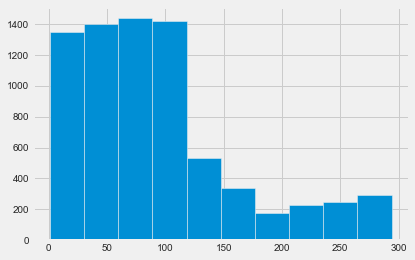

In [413]:
# на основе DistrictSize создадим признак DistrictCluster. Для начала построим распределение DistrictSize
df.loc[df['DistrictSize'] < 400, 'DistrictSize'].hist(bins = 10);

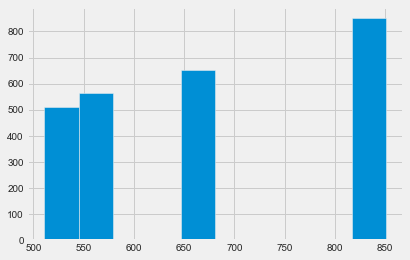

In [414]:
df.loc[df['DistrictSize'] > 400, 'DistrictSize'].hist(bins = 10);

**DistrictCluster**

In [ ]:
# Можно выделить 5 кластеров, для этого напишем функцию, которая в зависимости от размера DistrictSize, определит его номер
# кластера.

In [415]:
def cluster_district(row):
    if row['DistrictSize'] < 105:
        return 1
    if row['DistrictSize'] > 104 and row['DistrictSize'] < 301:
        return 2
    if row['DistrictSize'] > 300 and row['DistrictSize'] < 601:
        return 3
    if row['DistrictSize'] > 600 and row['DistrictSize'] < 801:
        return 3
    if row['DistrictSize'] > 800:
        return 4
    return 5

In [416]:
df['DistrictCluster'] = df.apply(cluster_district, axis = 1)

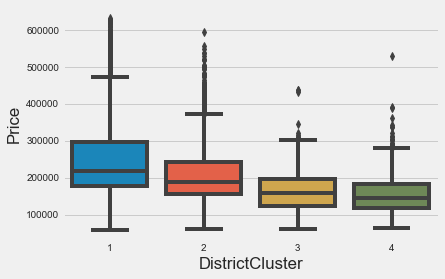

In [417]:
sns.boxplot(df['DistrictCluster'], df['Price'], data = df);

#### MedPriceByDistrict

In [418]:
med_price_by_district = df.groupby(['DistrictCluster'], as_index=False).agg({'Price':'median'})\
                      .rename(columns={'Price':'MedPriceByDistrict'})
df = df.merge(med_price_by_district, on='DistrictCluster', how='left').set_index(df.index)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,AddSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,DistrictCluster,MedPriceByDistrict
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,12.538811,7,9.0,1969.0,0.089040,...,0,11,B,184966.930730,1,1,1,22,1,217125.338215
15053,41,3.0,65.683640,40.049543,8.0,17.634097,7,9.0,1978.0,0.000070,...,1,16,B,300009.450063,1,1,1,87,1,217125.338215
4765,53,2.0,44.947953,29.197612,6.0,15.750341,8,12.0,1968.0,0.049637,...,1,3,B,220925.908524,1,1,1,174,2,189636.055633
5809,58,2.0,53.352981,52.731512,9.0,8.378531,8,17.0,1977.0,0.437885,...,0,5,B,175616.227217,1,1,1,179,2,189636.055633
10783,99,1.0,39.649192,23.776169,7.0,8.873023,11,12.0,1976.0,0.012339,...,2,4,B,150226.531644,1,1,1,97,1,217125.338215


**MedPriceByRooms**

In [419]:
med_price_by_rooms = df.groupby(['Rooms'], as_index=False).agg({'Price':'median'})\
                      .rename(columns={'Price':'MedPriceByRooms'})

In [420]:
med_price_by_rooms.head()

,Rooms,MedPriceByRooms
0,1.0,154983.674298
1,2.0,200377.728472
2,3.0,268723.157677
3,4.0,377524.231990
4,5.0,455355.638212


In [421]:
df = df.merge(med_price_by_rooms, on='Rooms', how='left').set_index(df.index)
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,AddSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,DistrictCluster,MedPriceByDistrict,MedPriceByRooms
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,12.538811,7,9.0,1969.0,0.089040,...,11,B,184966.930730,1,1,1,22,1,217125.338215,200377.728472
15053,41,3.0,65.683640,40.049543,8.0,17.634097,7,9.0,1978.0,0.000070,...,16,B,300009.450063,1,1,1,87,1,217125.338215,268723.157677
4765,53,2.0,44.947953,29.197612,6.0,15.750341,8,12.0,1968.0,0.049637,...,3,B,220925.908524,1,1,1,174,2,189636.055633,200377.728472
5809,58,2.0,53.352981,52.731512,9.0,8.378531,8,17.0,1977.0,0.437885,...,5,B,175616.227217,1,1,1,179,2,189636.055633,200377.728472
10783,99,1.0,39.649192,23.776169,7.0,8.873023,11,12.0,1976.0,0.012339,...,4,B,150226.531644,1,1,1,97,1,217125.338215,154983.674298


### Визуализация и анализ данных

### Анализ целевой переменной 

In [422]:
df['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

In [423]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]

target_mean, target_median, target_mode

(214138.86, 192269.64487934904, 59174.77802758122)

#### Распределение целевой переменной

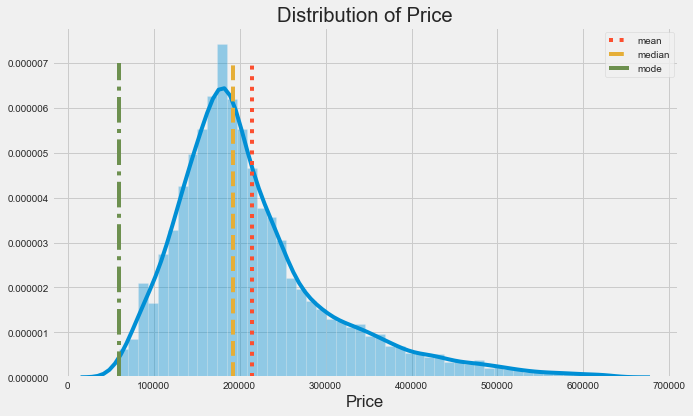

In [424]:
plt.figure(figsize = (10, 6))

sns.distplot(df['Price'])

y = np.linspace(0, 0.000007, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

#### Взаимодействие признаков (количественные - количественные)

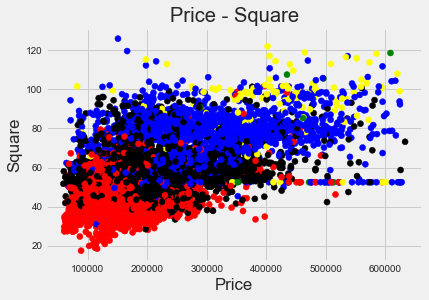

In [425]:
# как и ранее было понятно, в основном выделяются три сегмента 1, 2, 3 комнаты.
# конечно, понятно, что прямую зависимостей сложно себе пока что представить. 
plt.scatter(df['Price'], df['Square'], 
            c = df['Rooms'].map({1: 'red', 2: 'black', 3: 'blue', 4: 'yellow', 
                                 5: 'green', 6: 'pink', 10: 'orange', 19: 'purple'}));
plt.xlabel('Price')
plt.ylabel('Square')
plt.title('Price - Square')
plt.show()

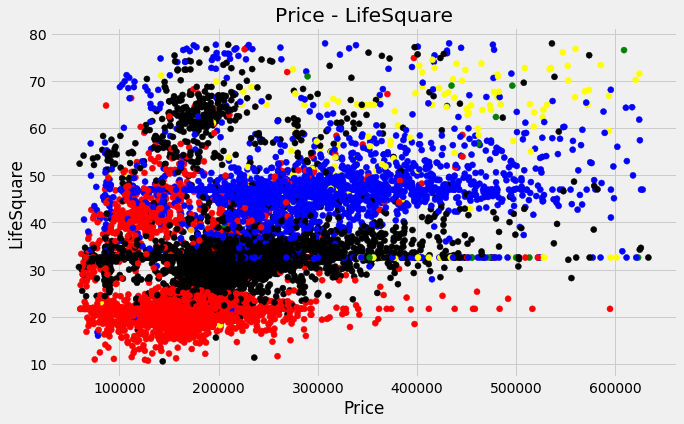

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['LifeSquare'],
            c = df['Rooms'].map({1: 'red', 2: 'black', 3: 'blue', 4: 'yellow', 
                                 5: 'green', 6: 'pink', 10: 'orange', 19: 'purple'}));
plt.xlabel('Price')
plt.ylabel('LifeSquare')
plt.title('Price - LifeSquare')
plt.show()

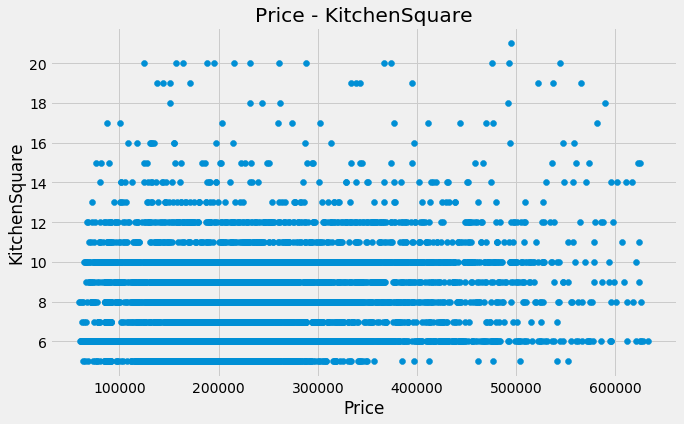

In [113]:
# построил еще в разрезе Rooms, но картина получилась очень пестрой и мало что понятно.
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['KitchenSquare'] );
plt.xlabel('Price')
plt.ylabel('KitchenSquare')
plt.title('Price - KitchenSquare')
plt.show()

#### Количественные - категориальные (будем считать, что в данном случае Rooms является категориальным признаком)

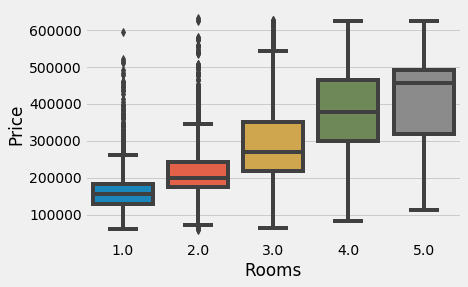

In [114]:
# сделал отсечку по количеству комнат = 5, распределение по 6 и более комнат мало что дает
sns.boxplot(df.loc[df['Rooms'] < 6 , 'Rooms'], df['Price'], data = df);

### Анализ признаков (количественные)

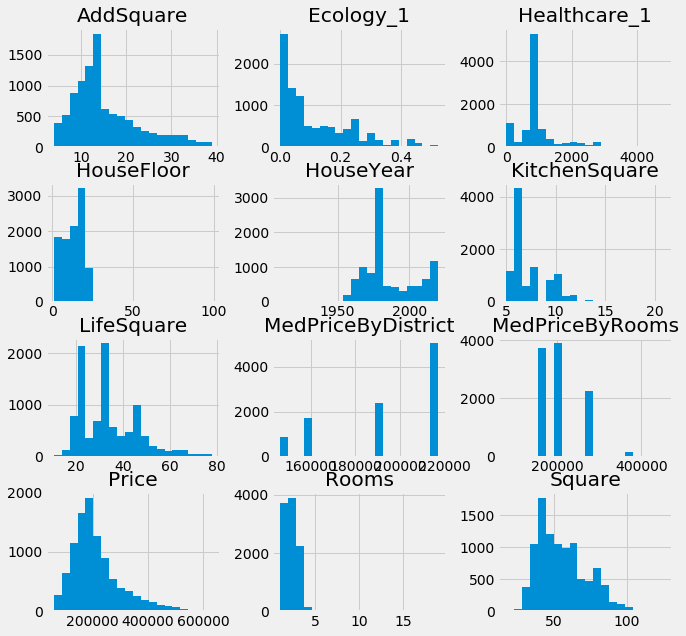

In [115]:
df_num_features = df.select_dtypes(include='float64')
df_num_features.hist(figsize=(10,10), bins=20, grid=True);

<Figure size 576x432 with 0 Axes>

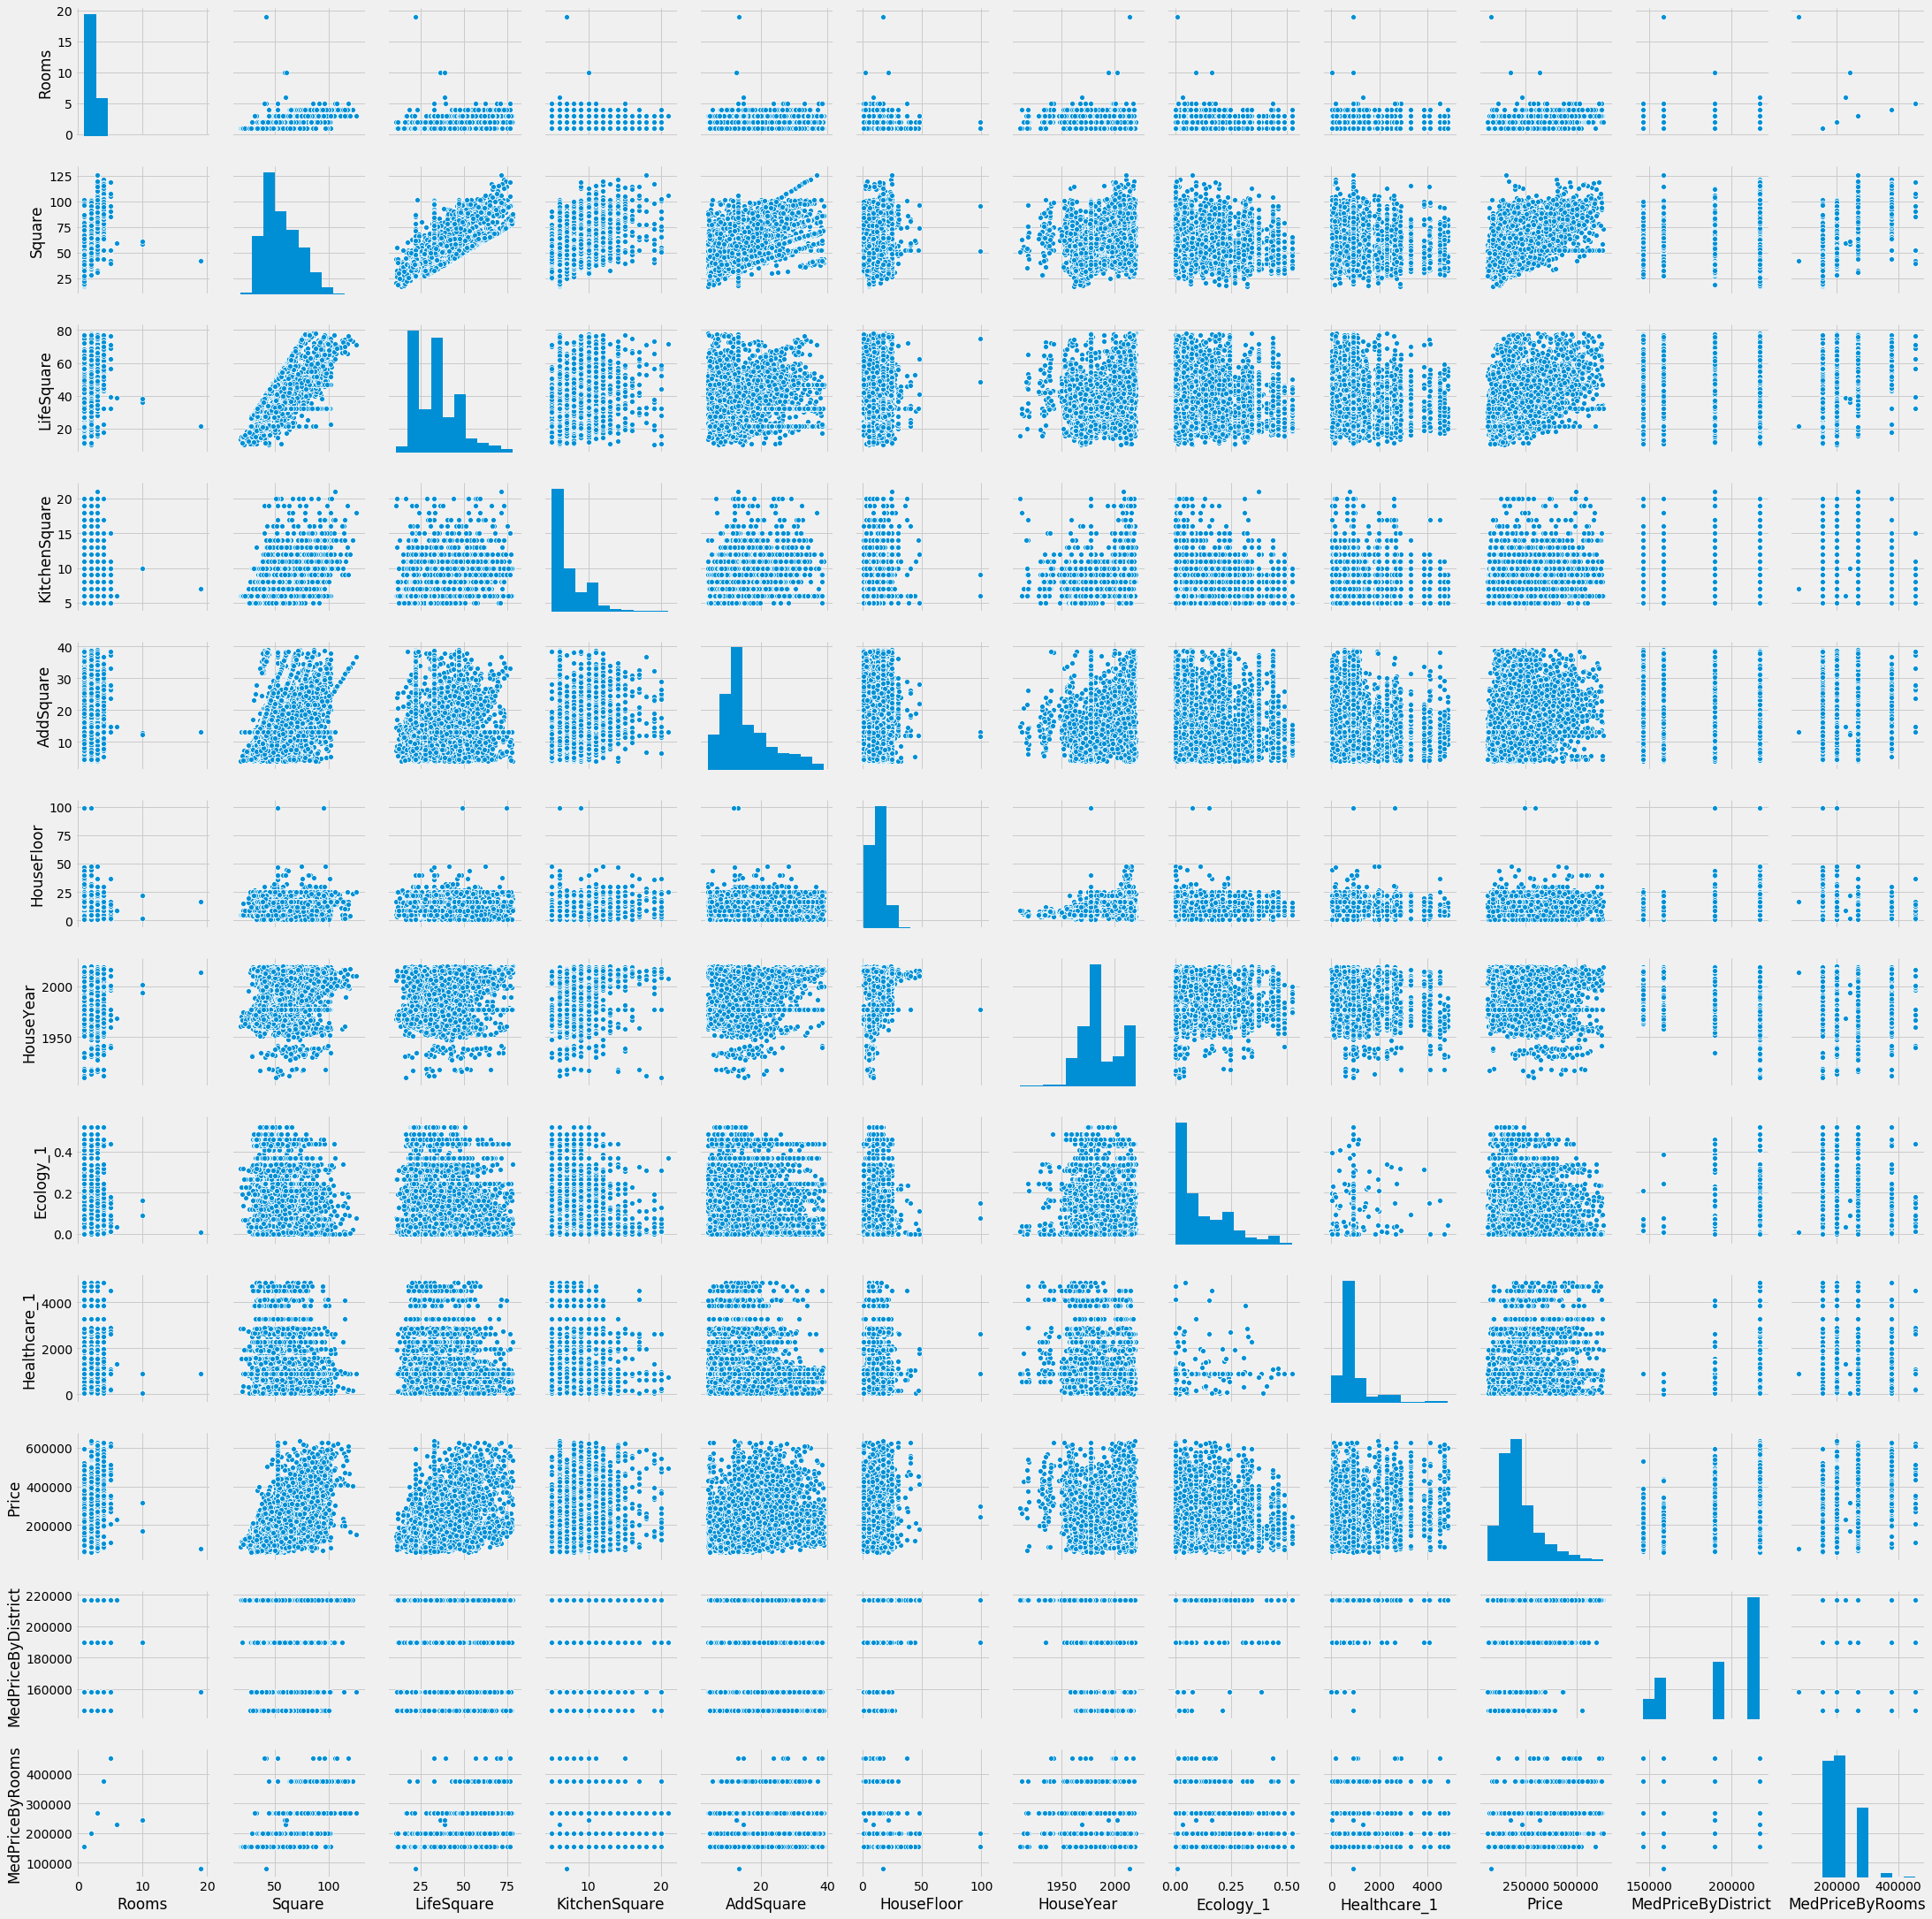

In [116]:
# plt.figure(figsize = (8, 6))
# sns.pairplot(df_num_features);

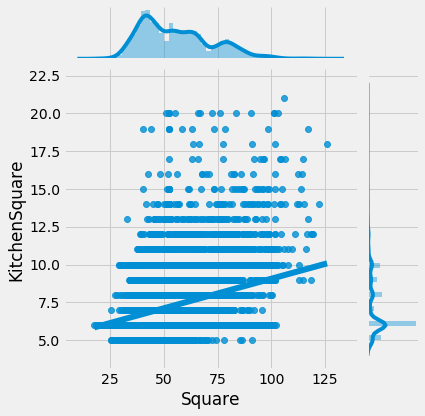

In [117]:
sns.jointplot(df['Square'],  df['KitchenSquare'], kind='reg');

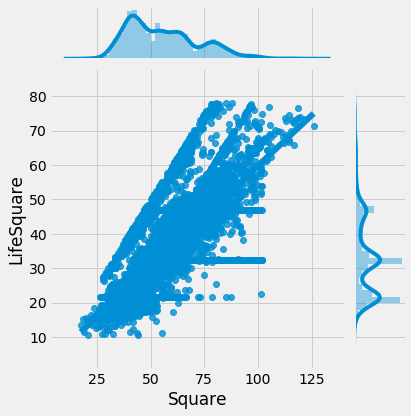

In [118]:
sns.jointplot(df['Square'], df['LifeSquare'], kind='reg');

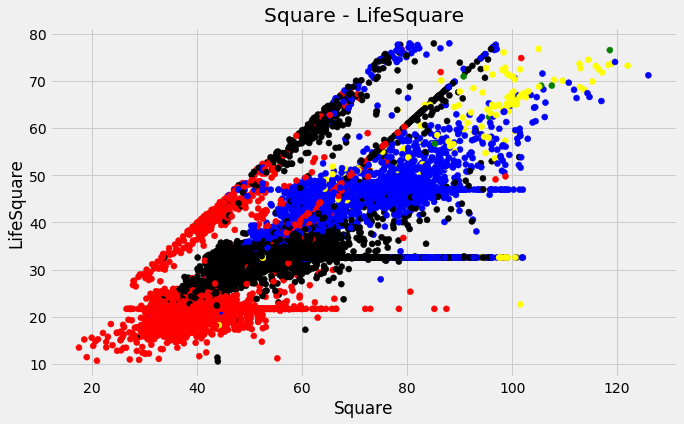

In [119]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Square'], df['LifeSquare'],
            c = df['Rooms'].map({1: 'red', 2: 'black', 3: 'blue', 4: 'yellow', 
                                 5: 'green', 6: 'pink', 10: 'orange', 19: 'purple'}));
plt.xlabel('Square')
plt.ylabel('LifeSquare')
plt.title('Square - LifeSquare')
plt.show()

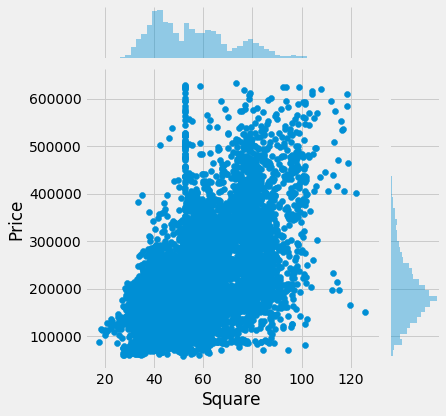

In [120]:
sns.jointplot(df['Square'], df['Price'], kind='scatter', height=6);

#### Матрица корреляций

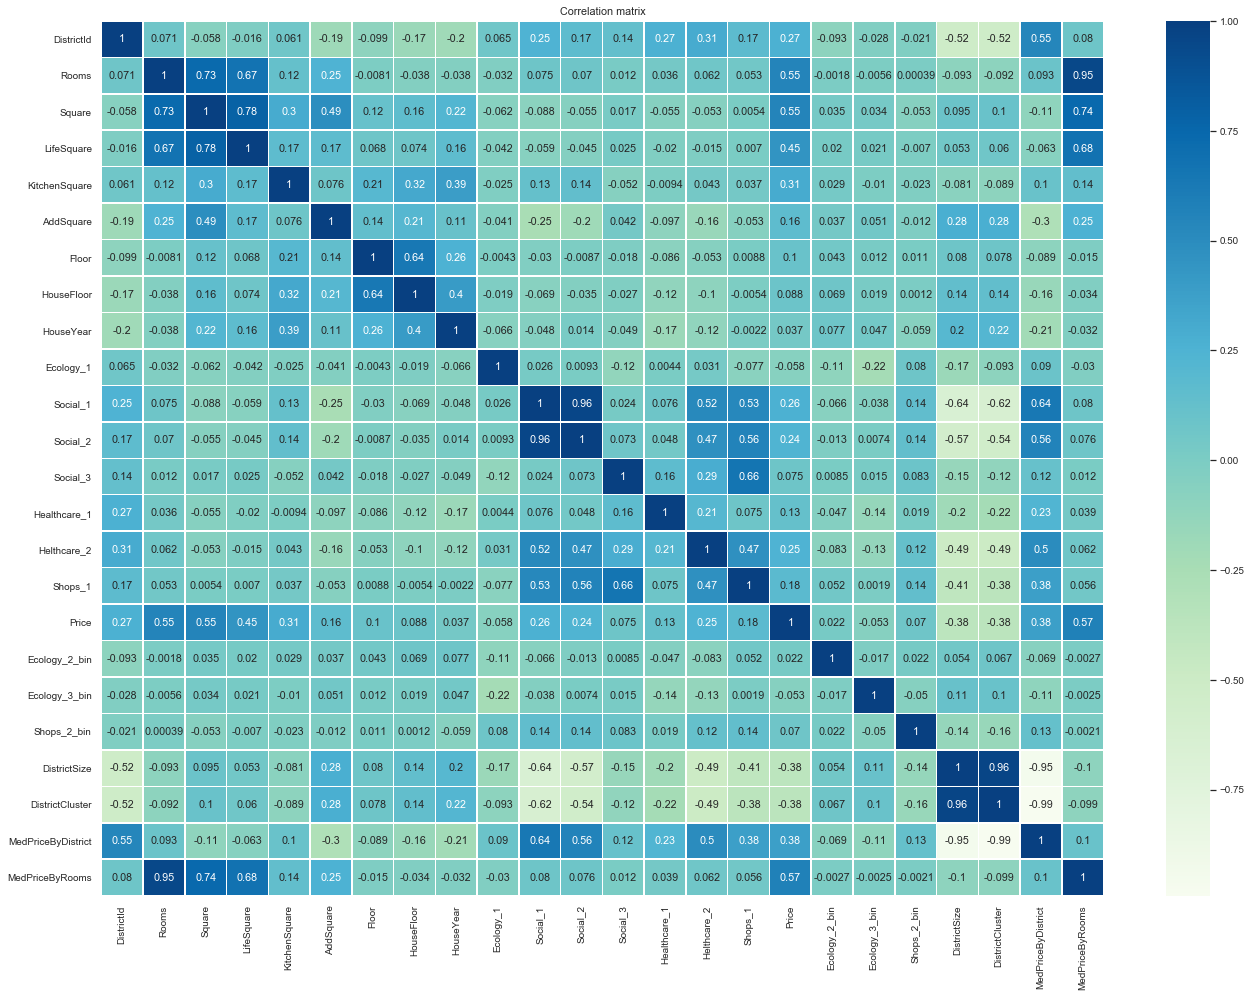

In [134]:
# plt.figure(figsize = (20,15))

# sns.set(font_scale=0.9)
# sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

# plt.title('Correlation matrix')
# plt.show()

### Отбор и посроение новых признаков

In [426]:
feature_names = ['DistrictId','Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'AddSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

new_feature_names = ['DistrictSize', 'MedPriceByRooms', 'DistrictCluster', 'MedPriceByDistrict']

target_name = 'Price'

In [427]:
X = df[feature_names + new_feature_names]
y = df[target_name]

### Разбиение выборки на тренировочную и тестовую

In [5]:
from sklearn.model_selection import train_test_split

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

### Стандартизация признаков

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [429]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Построение моделей, выбор лучшей

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

#### Случайный лес

In [140]:
# rf_model = RandomForestRegressor()
# cross_val_score_val = cross_val_score(rf_model,X_train_scaled, y_train, cv = 5, scoring='r2')
# cross_val_score_mean =cross_val_score(rf_model,X_train_scaled, y_train, cv = 5, scoring='r2').mean()
# display(cross_val_score_val, cross_val_score_mean)

array([0.70421154, 0.71022359, 0.65786243, 0.71851131, 0.75321282])

0.7115719027105791

#### Линейная регрессия

In [141]:
# lr_model = LinearRegression()
# lr_cross_val_score_val = cross_val_score(lr_model,X_train_scaled, y_train, cv = 5, scoring='r2')
# lr_cross_val_score_mean =cross_val_score(lr_model,X_train_scaled, y_train, cv = 5, scoring='r2').mean()
# display(lr_cross_val_score_val, lr_cross_val_score_mean)

array([0.54995077, 0.537766  , 0.55392366, 0.57743543, 0.59509865])

0.5628349046332446

#### Метод k-means

In [142]:
# knn_model = KNeighborsRegressor()
# knn_cross_val_score_val = cross_val_score(knn_model, X_train_scaled, y_train, cv = 5, scoring='r2')
# knn_cross_val_score_mean =cross_val_score(knn_model, X_train_scaled, y_train, cv = 5, scoring='r2').mean()
# display(knn_cross_val_score_val, knn_cross_val_score_mean)

array([0.61678638, 0.60997954, 0.64124259, 0.68055517, 0.68837967])

0.6473886690381654

#### Подбор гиперпараметров для базовой модели

In [117]:
# лучше всего из коробки работает Случайный лес, далее будем осуществлять более тонкую настройку.
# попробуем определить ручками наиболее важные гиперпараметры: max_depth, n_estimators и добавим max_features

In [143]:
# Создадим датафрейм куда будем записывать результаты r2_score в зависимости от значений гиперпараметров
# тестировал и другие диапазоны max_depth, но результаты хуже, поэтому оставил лучший вариант
# score_data = pd.DataFrame()
# max_depth_values = range(30, 45)
# temp_score_data = []
# for max_depth in max_depth_values:
#     rf_model = RandomForestRegressor(bootstrap=True, 
#                                      criterion='mse', 
#                                      max_depth=max_depth, 
#                                      random_state= 42)
#     rf_model.fit(X_train_scaled, y_train)
#     y_pred = rf_model.predict(X_test_scaled)
#     test_score = r2_score(y_test, y_pred)
    
#     temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'test_score':[test_score]})
#     score_data = score_data.append(temp_score_data)

In [144]:
# смотрим на результаты, выбираю 38
# score_data.sort_values(['test_score'], ascending = False).head(10)

,max_depth,test_score
0,30,0.716675
0,31,0.716360
0,36,0.715511
0,37,0.715454
0,35,0.715404
0,34,0.715389
0,38,0.715382
0,39,0.715382
0,40,0.715382
0,41,0.715382


In [145]:
# теперь тестируем n_estimators
# тестировал и другие диапазоны n_estimators, но результаты хуже, поэтому оставил лучший вариант
# score_data_estimators = pd.DataFrame()
# n_estimators_values = range(400, 501, 10)
# temp_score_data = []
# for n_estimators in n_estimators_values:
#     rf_model = RandomForestRegressor(bootstrap=True, 
#                                      criterion='mse', 
#                                      max_depth=38,
#                                      n_estimators = n_estimators,
#                                      random_state= 42)
#     rf_model.fit(X_train_scaled, y_train)
#     y_pred = rf_model.predict(X_test_scaled)
#     test_score = r2_score(y_test, y_pred)
    
#     temp_score_data = pd.DataFrame({'n_estimators': [n_estimators], 'test_score':[test_score]})
#     score_data_estimators = score_data_estimators.append(temp_score_data)

In [146]:
# выбираю n_estimators = 430.
# score_data_estimators.sort_values(['test_score'], ascending = False)

,n_estimators,test_score
0,400,0.717550
0,500,0.717539
0,410,0.717447
0,480,0.717411
0,490,0.717378
0,430,0.717371
0,420,0.717269
0,440,0.717267
0,460,0.717243
0,450,0.717238


In [147]:
# теперь тестируем max_features
# score_data_feat = pd.DataFrame()
# max_features_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# temp_score_data = []
# for max_features in max_features_values:
#     rf_model = RandomForestRegressor(bootstrap=True, 
#                                      criterion='mse', 
#                                      max_depth=31,
#                                      n_estimators = 430,
#                                      max_features = max_features,
#                                      random_state= 42)
#     rf_model.fit(X_train_scaled, y_train)
#     y_pred = rf_model.predict(X_test_scaled)
#     test_score = r2_score(y_test, y_pred)
    
#     temp_score_data = pd.DataFrame({'max_features': [max_features], 'test_score':[test_score]})
#     score_data_feat = score_data_feat.append(temp_score_data)

In [148]:
# выбираем max_features = 0.5
# score_data_feat.sort_values(['max_features'], ascending = False)

,max_features,test_score
0,0.9,0.719055
0,0.8,0.718142
0,0.7,0.721118
0,0.6,0.720403
0,0.5,0.719011
0,0.4,0.720594
0,0.3,0.718593
0,0.2,0.718925
0,0.1,0.715135


In [433]:
# когда определились с гиперпараметрами, то строим базаовую модель
rf_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=38, n_estimators = 430, max_features = 0.5,
                                 random_state= 42)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
test_score = r2_score(y_test, y_pred)
test_score

0.7196206413008734

In [31]:
# проверяем на кросс-валидации
# rf_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=38, n_estimators = 430, max_features = 0.5,
#                                  random_state= 42)
# cross_val_score_val = cross_val_score(rf_model,X_train_scaled, y_train, cv = 5, scoring='r2')
# cross_val_score_mean =cross_val_score(rf_model,X_train_scaled, y_train, cv = 5, scoring='r2').mean()
# display(cross_val_score_val, cross_val_score_mean)

array([0.71613914, 0.72346135, 0.68055626, 0.73654641, 0.75947698])

0.7232360283954609

#### Важность признаков

In [434]:
features = X_train_scaled.columns
feature_importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'features': features, 'feature_importances': feature_importances})
feature_importances_df.sort_values(['feature_importances'],ascending = False)

,features,feature_importances
2,Square,0.175844
20,MedPriceByRooms,0.146750
19,DistrictSize,0.127801
1,Rooms,0.089325
3,LifeSquare,0.061189
14,Social_3,0.046046
13,Social_2,0.038832
8,HouseYear,0.037166
12,Social_1,0.036050
5,AddSquare,0.035121


### Тестовые данные

#### Предобработка данных

In [481]:
df_test = pd.read_csv('test.csv', index_col=0)
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [482]:
df_test.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

#### LifeSquare

In [483]:
df_test['LifeSquare'] = df_test.apply(fill_LifeSquare, axis = 1)

In [484]:
df_test.loc[pd.isnull(df_test['LifeSquare'])]['LifeSquare'].sum()

0.0

In [485]:
df_test.loc[df_test['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
df_test.loc[pd.isnull(df_test['Healthcare_1'])]['Healthcare_1'].sum()

0.0

#### Square

In [486]:
df_test.loc[(df_test['Square'] > upper_outlines) | (df_test['Square'] < lower_outlines), 'Square'] = df['Square'].median()

#### AddSquare

In [487]:
df_test['AddSquare'] = np.abs(df_test['Square'] - (df_test['LifeSquare']+ df_test['KitchenSquare']))

In [488]:
df_test.loc[df_test['AddSquare'] < 4, 'AddSquare'] = df['AddSquare'].median()
df_test.loc[(df_test['AddSquare'] > 39) & ((df_test['Rooms'] == 1) |(df_test['Rooms'] == 2)), 'AddSquare'] = df_median_AddSquare_room_1_2
df_test.loc[(df_test['AddSquare'] > 39) & ((df_test['Rooms'] != 1) |(df_test['Rooms'] != 2)), 'AddSquare'] = df['AddSquare'].median()

#### KitchenSquare

In [489]:
df_test.loc[df_test['KitchenSquare'] < 5, 'KitchenSquare'] = df_median_KitchenSquare
df_test.loc[df_test['KitchenSquare'] > upper_outlines_KitchenSquare, 'KitchenSquare'] =  df_median_KitchenSquare

#### LifeSquare

In [490]:
df_test.loc[(df_test['LifeSquare'] < 9.5) & (df_test['Rooms'] == 1), 'LifeSquare'] =  df_median_LifeSquare_room1
df_test.loc[df_test['LifeSquare'] < 9.5, 'LifeSquare'] = df_median_LifeSquare
df_test.loc[df_test['LifeSquare'] > upper_outlines_LifeSquare, 'LifeSquare'] =  df_median_LifeSquare

In [491]:
#Square 
df_test.loc[df_test['Square']<(df_test['LifeSquare']),'Square'] = df_test['LifeSquare']+df_test['KitchenSquare']+df_test['AddSquare']

#### Rooms

In [492]:
df_test['Rooms'] = df_test.apply(fill_rooms, axis = 1)

#### HouseYear и HouseFloor

In [493]:
df_test.loc[df_test['HouseYear'] > 2020, 'HouseYear'] = df['HouseYear'].median()

In [494]:
df_test.loc[df_test['HouseFloor'] > 100, 'HouseFloor'] = df['HouseFloor'].median()
df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()
test_floor_outliers = df_test.loc[df_test['Floor'] > df_test['HouseFloor']].index
df_test.loc[test_floor_outliers, 'Floor'] = df_test.loc[test_floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

### Построение новых признаков в тренеровочном датасете

**Dummies**

In [495]:
df_test['Ecology_2_bin'] = df_test['Ecology_2'].map({'A':0, 'B':1})
df_test['Ecology_3_bin'] = df_test['Ecology_3'].map({'A':0, 'B':1})
df_test['Shops_2_bin'] = df_test['Shops_2'].map({'A':0, 'B':1})

**District_size**

In [496]:
df_test = df_test.merge(district_size, on='DistrictId', how='left').set_index(df_test.index)

In [497]:
df_test.loc[df_test['DistrictSize'].isnull(), 'DistrictSize'] = df['DistrictSize'].median()

**DistrictCluster**

In [498]:
df_test['DistrictCluster'] = df_test.apply(cluster_district, axis = 1)

#### MedPriceByDistrict

In [499]:
df_test = df_test.merge(med_price_by_district, on='DistrictCluster', how='left').set_index(df_test.index)

In [500]:
df_test.loc[df_test['MedPriceByDistrict'].isnull(), 'MedPriceByDistrict'] = df['MedPriceByDistrict'].median()

#### MedPriceByRooms

In [501]:
df_test = df_test.merge(med_price_by_rooms, on='Rooms', how='left').set_index(df_test.index)

In [502]:
df_test.loc[df_test['MedPriceByRooms'].isnull(), 'MedPriceByRooms'] = df['MedPriceByRooms'].median()

### Отбор и стандартизация признаков 

In [503]:
test_feature_names = ['DistrictId','Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'AddSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

test_new_feature_names = ['DistrictSize', 'MedPriceByRooms', 'DistrictCluster', 'MedPriceByDistrict']

In [504]:
df_test= df_test[feature_names + new_feature_names]

In [505]:
df_test_scaled = scaler.transform(df_test)

#### Прогноз

In [506]:
y_pred = rf_model.predict(df_test_scaled)

In [507]:
predictions = pd.DataFrame({
    'Id': df_test.index,
    'Price': y_pred
})

In [508]:
df_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,AddSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_bin,DistrictSize,MedPriceByRooms,DistrictCluster,MedPriceByDistrict
Id,,,,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,10.449862,6,14.0,1972.0,0.310199,...,2748,1,900.0,0,0,1,179.0,200377.728472,2,189636.055633
15856,74,2.0,69.263183,32.552134,6.0,35.711049,1,1.0,1977.0,0.075779,...,1437,3,900.0,0,2,1,114.0,200377.728472,2,189636.055633
5480,190,1.0,42.298674,15.948246,12.0,14.350428,2,5.0,1909.0,0.000000,...,7538,87,4702.0,5,5,1,7.0,154983.674298,1,217125.338215
15664,47,2.0,73.046609,51.940842,9.0,12.105767,22,22.0,2007.0,0.101872,...,4583,3,900.0,3,3,1,97.0,200377.728472,1,217125.338215
14275,27,1.0,47.527111,43.387569,6.0,13.191054,17,17.0,2017.0,0.072158,...,629,1,900.0,0,0,0,851.0,154983.674298,4,146171.433190


In [509]:
df_test.index

Int64Index([  725, 15856,  5480, 15664, 14275,  7633, 13329,  5502,  4220,
            11538,
            ...
            15706,  2105,  7220, 14562,  6836,  8180,  4695,  5783,  4780,
            12504],
           dtype='int64', name='Id', length=5000)

In [510]:
predictions.head()

,Id,Price
0,725,157036.019692
1,15856,233850.233548
2,5480,284717.608673
3,15664,302618.103633
4,14275,135785.566856


In [511]:
predictions.isna().sum()

Id       0
Price    0
dtype: int64

In [512]:
predictions.shape

(5000, 2)

In [513]:
predictions.to_csv('EDomrachev_predictions.csv', index=False, encoding='utf-8')